<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let $X$ be a numerical dataset comprising $N$ observations, where each observation is characterized by $m$ numerical features, and let $y$ represent the corresponding target variable. The objective of Ordinary Least Squares (OLS) regression is to determine the coefficient vector $\beta$ that minimizes the residual error $\|X\beta - y\|$. Geometrically, the optimal coefficient vector $\beta$ is obtained by projecting $y$ onto the column space of $X$, ensuring that the residual vector $y - X\beta$ is orthogonal to this subspace. It is mathematically formulated by  

## $$X^T(X\beta - y) = 0,$$  

## which yields  

## $$\beta = (X^T X)^{-1} X^T y.$$


##Remarks.

##- In this approach, the Euclidean norm defines the notion of distance. However, various other distance metrics are commonly employed in machine learning algorithms, which may be more suitable in certain cases. These metrics are not induced by an inner product, and consequently, the concept of orthogonality does not necessarily hold. This absence poses significant challenges when formulating the coefficient vector $\beta$.
    
## Although the square matrix $X^T X$ is generally nonsingular, numerical instability can pose significant challenges, potentially compromising computational reliability. To mitigate this issue, various regularization techniques, such as Lasso and Ridge regression, are employed to enhance numerical stability and prevent ill-conditioning.  

## As a methodological refinement, one may introduce a controlled perturbation to the original dataset $X$ by defining $X_{\lambda} = X + \lambda I'$, where $\lambda$ is a nonzero scalar. Ordinary least squares (OLS) estimation is then applied to this modified dataset, with the corresponding loss function given by:


##$$
\tilde{L}(\beta, \lambda) = \| (X \beta - y)    + \lambda I'\beta\|^2.
$$

## Geometrically, this corresponds to projecting the target vector $y$ onto the hyperplane spanned by the columns of $X + \lambda I'$.

## Sufficiently small scalars $\lambda$ that ensure the numerical stability of the inverse of $X_{\lambda}^T X_{\lambda}$ lead to the following prediction:  

## $$
y_{\text{pred}} = X_\lambda\beta  ~~~~\text{where}~~~\beta = (X_\lambda^T X_\lambda)^{-1} X_\lambda^Ty
$$





In [ ]:
import  numpy as np
import pandas as pd

In [ ]:
import pandas as pd

# Load the dataset
Boston = pd.read_csv('BostonHousing.csv')

# Apply style to 'medv' column using applymap
styled_boston = Boston.iloc[0:10].style.applymap(lambda val: 'color: red' , subset=['medv'])

# Display the styled DataFrame
styled_boston


<ipython-input-28-8f32f2636261>:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_boston = Boston.iloc[0:10].style.applymap(lambda val: 'color: red' , subset=['medv'])


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3,222,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000,386.710000,17.100000,18.900000


In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
Boston.isnull().sum()
Boston.iloc[2,2]=np.NaN
Boston.isnull().sum()
Boston.head()
Boston.dropna()
Boston.info()
Boston.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   chas     505 non-null    float64
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Index(['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston.drop('chas', axis=1)


,crim,zn,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


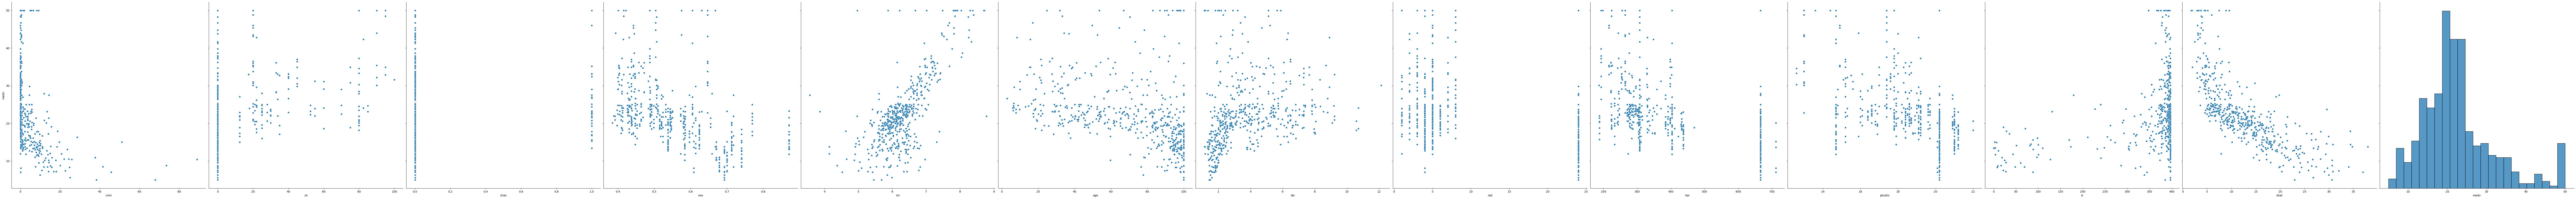

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = Boston.columns

sns.pairplot(Boston , y_vars = 'medv' , x_vars = features , height=10)
plt.show()

Intercept: 78.18
Age Coefficient: 0.42 (BP increase per year)
BMI Coefficient: 0.62 (BP increase per BMI unit)


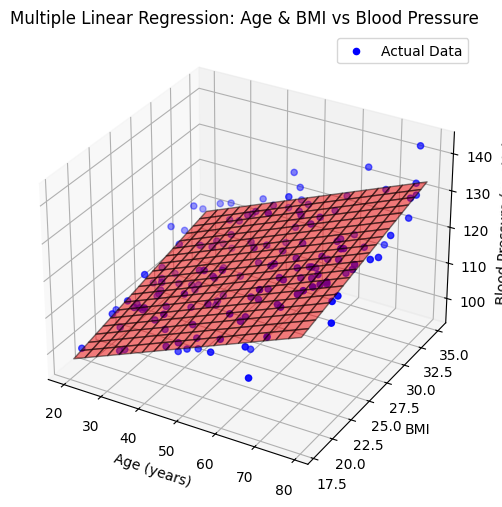

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Simulating data
np.random.seed(42)
ages = np.random.randint(20, 80, 150)  # Age: 20 to 80 years
bmi = np.random.uniform(18, 35, 150)  # BMI: 18 to 35 range
blood_pressure = 80 + 0.4 * ages + 0.6 * bmi + np.random.normal(0, 5, 150)  # BP formula with noise

# Prepare feature matrix (X) and target variable (y)
X = np.column_stack((ages, bmi))  # Two features: Age and BMI
y = blood_pressure  # Target: Blood Pressure

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Age Coefficient: {model.coef_[0]:.2f} (BP increase per year)")
print(f"BMI Coefficient: {model.coef_[1]:.2f} (BP increase per BMI unit)")

# Create meshgrid for regression plane
age_range = np.linspace(min(ages), max(ages), 20)
bmi_range = np.linspace(min(bmi), max(bmi), 20)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)
bp_grid = model.intercept_ + model.coef_[0] * age_grid + model.coef_[1] * bmi_grid  # Plane equation

# 3D Plot: Data points + Regression Plane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual Data')

# Plot regression plane
ax.plot_surface(age_grid, bmi_grid, bp_grid, color='red', alpha=0.5, edgecolor='black')

# Labels & title
ax.set_xlabel("Age (years)")
ax.set_ylabel("BMI")
ax.set_zlabel("Blood Pressure (mmHg)")
ax.set_title("Multiple Linear Regression: Age & BMI vs Blood Pressure")
ax.legend()
plt.savefig('2dlinear.pdf', format='pdf')
plt.show()


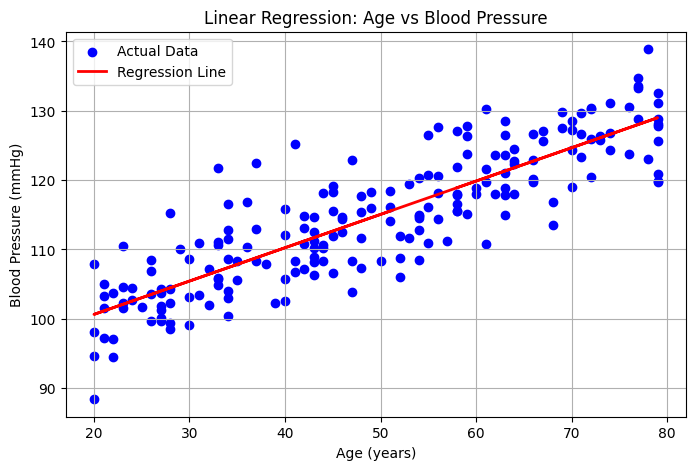

Intercept: 91.03
Slope: 0.48 (BP increases by this per year)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulating age and blood pressure data
np.random.seed(42)  # For reproducibility
ages = np.random.randint(20, 80, 200)  # Random ages between 20 and 80
blood_pressure = 90 + 0.5 * ages + np.random.normal(0, 5, 200)  # BP increases with age + noise

# Reshape ages for sklearn (as it expects 2D input)
ages = ages.reshape(-1, 1)

# Perform Linear Regression
model = LinearRegression()
model.fit(ages, blood_pressure)

# Predict blood pressure values
predicted_bp = model.predict(ages)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(ages, blood_pressure, color='blue', label='Actual Data')  # Scatter plot
plt.plot(ages, predicted_bp, color='red', linewidth=2, label='Regression Line')  # Regression line
plt.xlabel("Age (years)")
plt.ylabel("Blood Pressure (mmHg)")
plt.title("Linear Regression: Age vs Blood Pressure")
plt.legend()
plt.grid(True)
plt.savefig('onedimentional.pdf', format = 'pdf')
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f} (BP increases by this per year)")


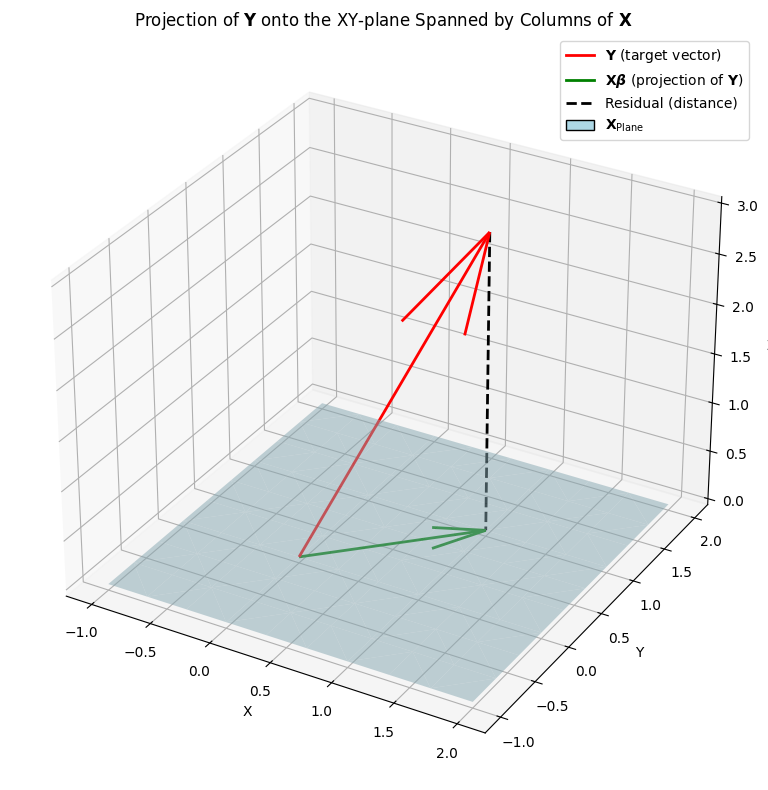

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Define the matrix X with column vectors that lie in the XY-plane
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
X = np.column_stack((v1, v2))  # X spans the XY-plane

# Define the target vector Y pointing upward
Y = np.array([1, 1, 3])  # This has a component in Z, off the XY-plane

# Compute the least squares projection of Y onto the plane
beta_hat = np.linalg.lstsq(X, Y, rcond=None)[0]
Y_proj = X @ beta_hat  # Projection of Y onto the plane

# Generate a mesh grid of the XY-plane
s_vals = np.linspace(-1, 2, 10)
t_vals = np.linspace(-1, 2, 10)
S, T = np.meshgrid(s_vals, t_vals)
plane_points = np.array([s * v1 + t * v2 for s, t in zip(S.flatten(), T.flatten())])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the XY plane
ax.plot_trisurf(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2],
                alpha=0.5, color='lightblue')

# Plot vector Y (target)
ax.quiver(0, 0, 0, *Y, color='red', linewidth=2)

# Plot the projection of Y onto the plane
ax.quiver(0, 0, 0, *Y_proj, color='green', linewidth=2)

# Draw the residual vector (from Y to projection)
ax.plot([Y[0], Y_proj[0]], [Y[1], Y_proj[1]], [Y[2], Y_proj[2]],
        'k--', linewidth=2)

# Custom legend
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label=r'$\mathbf{Y}$ (target vector)'),
    Line2D([0], [0], color='green', lw=2, label=r'$\mathbf{X\boldsymbol{\beta}}$ (projection of $\mathbf{Y}$)'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='Residual (distance)'),
    Patch(facecolor='lightblue', edgecolor='black', label=r'$\mathbf{X}_{\text{Plane}}$')
]

# Axes labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'Projection of $\mathbf{Y}$ onto the XY-plane Spanned by Columns of $\mathbf{X}$')
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig('projection.pdf', format='pdf')
plt.show()
